## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pycountry
import matplotlib.dates as mdates
import pickle

## Date Retrieval from the Data
The main goal is to learn more about the data's history, understand its time range, and to identify the date of data retrieval. Any problems, such as a file not being found, are also addressed. 

In [3]:
input_file_path = '../data/dates.pkl'

try:
    with open(input_file_path, 'rb') as input_file:
        dates_data = pickle.load(input_file)

    start_date = dates_data.get("start_date")
    end_date = dates_data.get("end_date")
    current_date = dates_data.get("current_date")

    # Print or use the retrieved dates
    print("Start Date of data:", start_date)
    print("End Date of data:", end_date)
    print("Date of data retrieval:", current_date)

except FileNotFoundError:
    print("File not found:", input_file_path)

Start Date of data: 2019-01-01
End Date of data: 2023-07-31
Date of data retrieval: 2023-08-18


## Yearly Analysis of Repositories Creation
##### NB: The data considers repositories with atleast one GAP file identified by the classifier
This section provides more information on how repository creation has changed over time. The actions are as follows:

Loading Repository Details: Load the repository_details.csv file, which provide data about the repositories. For further analysis, modification, and visualisation, the data is imported into a pandas DataFrame called repository_df.

Date Extraction: To analyse the data annually, the year data is taken out of the "Created Date" column.
The number of repositories generated in each year is counted by first grouping the repositories by year.

Visualisation: Using a bar chart created using Matplotlib, results are shown. With customised design for easier reading, the chart displays the number of repositories generated annually. The chart is kept for future use as a reference or for sharing, and data points are recognised with the dates of creation.

In [4]:
# Read data
repository_df = pd.read_csv("../data/repository_details.csv")

In [5]:
# Extract year from dates
repository_df["Created Date"] = pd.to_datetime(repository_df["Created Date"])
repository_df["Year"] = repository_df["Created Date"].dt.year

# Group by Year and Count
repositories_per_year = repository_df.groupby("Year").size()

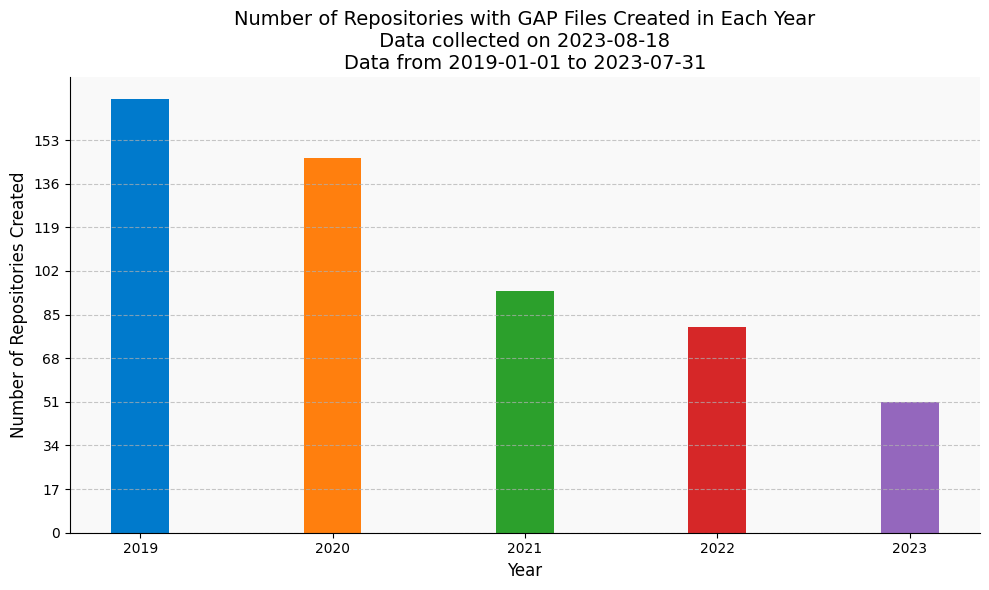

In [6]:
# Visualize the data 
plt.figure(figsize=(10, 6))  # Adjust the figure size

# Custom color scheme for bars
# Acknowledgment: The following colour codes are used from https://www.colorhexa.com/.
bar_colors = ['#007ACC', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B']

# Custom bar width and gap
bar_width = 0.3
bar_gap = 0.2

# Plot the bar chart
plt.bar(repositories_per_year.index, repositories_per_year.values, width=bar_width, color=bar_colors)

# Styling the chart
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Repositories Created", fontsize=12)
plt.title("Number of Repositories with GAP Files Created in Each Year\n Data collected on "+current_date+" \nData from "+start_date+" to "+end_date, fontsize=14)

data_max = int(repositories_per_year.values.max())

# Set interval as 10% of the data range
y_ticks_interval = round(data_max * 0.1)
if y_ticks_interval < 1:
    y_ticks_interval = 1
    
# Custom font for tick labels
plt.xticks(repositories_per_year.index, fontsize=10)
plt.yticks(range(0, data_max + 1, y_ticks_interval))
# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Customize the background color
# Acknowledgment: The following colour code is used from https://www.colorhexa.com/.
plt.gca().set_facecolor('#F9F9F9')

plt.tight_layout()  # Adjust spacing to prevent label overlap

# Save the plot as a PNG image
output_path = '../output/repository_per_year.png'  
plt.savefig(output_path,  dpi=400, bbox_inches='tight') 

plt.show()

## Geographical Distribution of Users Contributed to Repositories with GAP Files
##### NB: The data considers repositories with atleast one GAP file

This section aims to explain the global distribution of people who have contributed to repositories that have GAP files. This helps to understand the geographical diversity and growth of GAP community by gaining insights into areas with higher contributor activity.  The following steps are carried out:

Data Loading: The user_location.csv file is read to retrieve the users' countries-specific location information.

Aggregation: To calculate the number of users from each nation, the data is combined.

Shapefile Integration: The borders of each nation is displayed using the globe shapefile data (obtained from Natural Earth).

Data Merging: To enable geographic visualisation, the user count data is then integrated with the global shapefile data.

Visualisation: A choropleth map is used to show how users are distributed around the world. Each country's colour intensity reflects the proportion of users from that nation. This visualization has been saved for future reference or distribution.

In [7]:
# Read data from CSV
file_path = "../data/user_location.csv"  # Replace with the actual file path
user_location_df = pd.read_csv(file_path)

# Group by country and calculate the count of users from each country
country_counts = user_location_df['Country'].value_counts()

# Create a DataFrame with country names and their corresponding counts
df_countries = pd.DataFrame({'Country': country_counts.index, 'User Count': country_counts.values})

# Load world shapefile data using geopandas
# Acknowledgment: The world shapefile data is made with Natural Earth. Free vector and raster map data @ naturalearthdata.com.
world = gpd.read_file('../resources/ne_110m_admin_0_countries.shp')  

# Merge the world shapefile data with the user count data
merged_data = world.merge(df_countries, left_on='ADMIN', right_on='Country', how='left')

# Find the smallest positive value in the 'User Count' column
min_positive_value = merged_data['User Count'].min()

<Figure size 2500x1500 with 0 Axes>

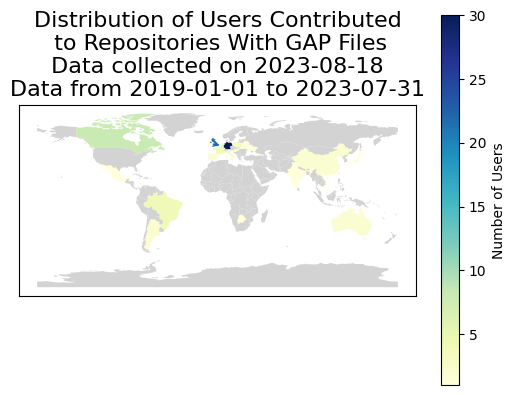

In [8]:
# Plot the choropleth map
plt.figure(figsize=(25, 15))  # Adjust the figure size if needed
merged_data.plot(column='User Count', cmap='YlGnBu', legend=True, vmin=min_positive_value, legend_kwds={'label': 'Number of Users'}, missing_kwds={'color': 'lightgrey'})
plt.title("Distribution of Users Contributed\n to Repositories With GAP Files\n Data collected on "+current_date+" \nData from "+start_date+" to "+end_date, fontsize=16)

plt.xticks([])  # Hide x-ticks
plt.yticks([])  # Hide y-ticks

# Save the plot as a PNG image
output_path = '../output/contributor_distribution_map.png'  # Specify the path and file name for the output image
plt.savefig(output_path,  dpi=1800, bbox_inches='tight')  # Use dpi to control the image resolution

plt.show()

## Yearly Trend of Repository Commits
##### NB: The data considers repositories with atleast one GAP file

The patterns and trends of commits to repositories over a number of years are examined in this section:

Data Loading: Repository activity data is loaded from the repository_activity.csv file.

Aggregation by Year: The dataset is grouped by "Year," which enables to aggregate and calculate total number of commits made each year. 

Visualisation Using a Line Chart: The annual commit data is displayed using a line chart. This makes it easier to identify recurring patterns or trends.

Customising the Chart: To enhance readability, the axes are labelled, the date tick marks are formatted, and a legend is included.

The line chart shows how repository commits have changed over time, highlighting times of high or low activity.

In [9]:
# Step 1: Read data from CSV
repository_activity_file_path = "../data/repository_activity.csv"  # Replace with the actual file path
repository_activity_df = pd.read_csv(repository_activity_file_path)

# Group the DataFrame by month and calculate the sum of commits, issues, and pull requests per month
grouped_repository_activity_df = repository_activity_df.groupby('Year').sum()

# Extract the timeline (months) from the index and convert it to datetime
timeline = pd.to_datetime(grouped_repository_activity_df.index, format='%Y')


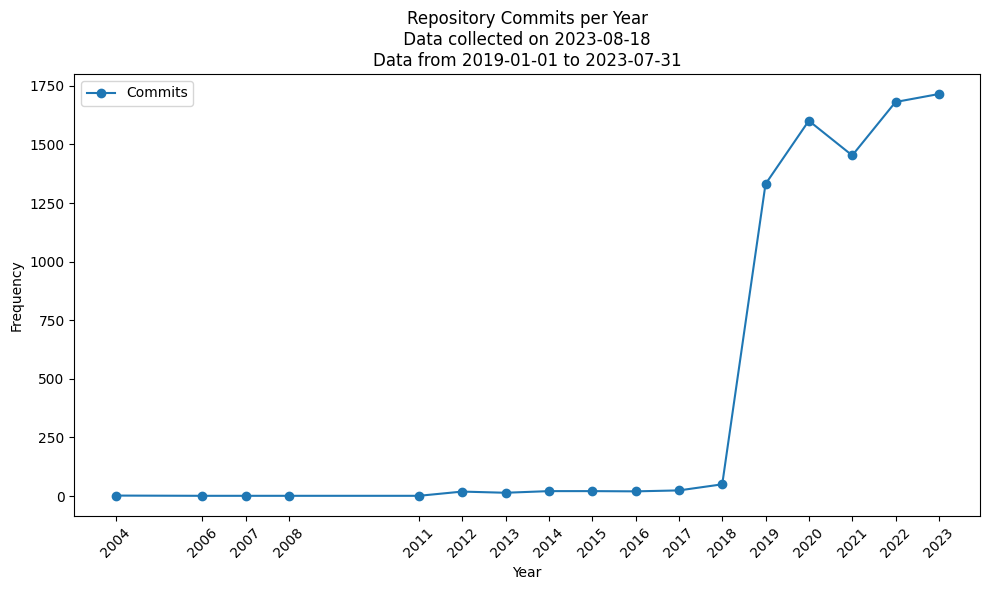

In [10]:
# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(timeline, grouped_repository_activity_df['Commits Per Year'], label='Commits', marker='o')

# Customize the chart
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title("Repository Commits per Year\n Data collected on "+current_date+" \nData from "+start_date+" to "+end_date)
plt.legend()

date_format = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_formatter(date_format)

# Set the x-axis ticks to be the same as the timeline (years) without modifications
plt.xticks(timeline)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()

# Save the plot as a PNG image
output_path = '../output/repository_commits.png'  
plt.savefig(output_path,  dpi=400, bbox_inches='tight')  

plt.show()

## Yearly Trends of Issues and Pull Requests in Repositories
##### NB: The data considers repositories with atleast one GAP file

In this section we aim to gain insight on two important metrics in repository management: issues and pull requests. The repository's activity levels and trends in issue reporting and collaborative pull requests over the specified timeframe can be identified by visualising these information. Understanding these trends over the years can provide information on repository maintenance, community engagement, and the evolution of collaborative efforts. The following steps are done:

Line Chart Creation: With the dataset grouped by 'Year' from the previous section, the number of issues and pull requests for each year are plotted.

Customising the Chart: To enhance readability, the axes are labelled, the date tick marks are formatted, and a legend is included.


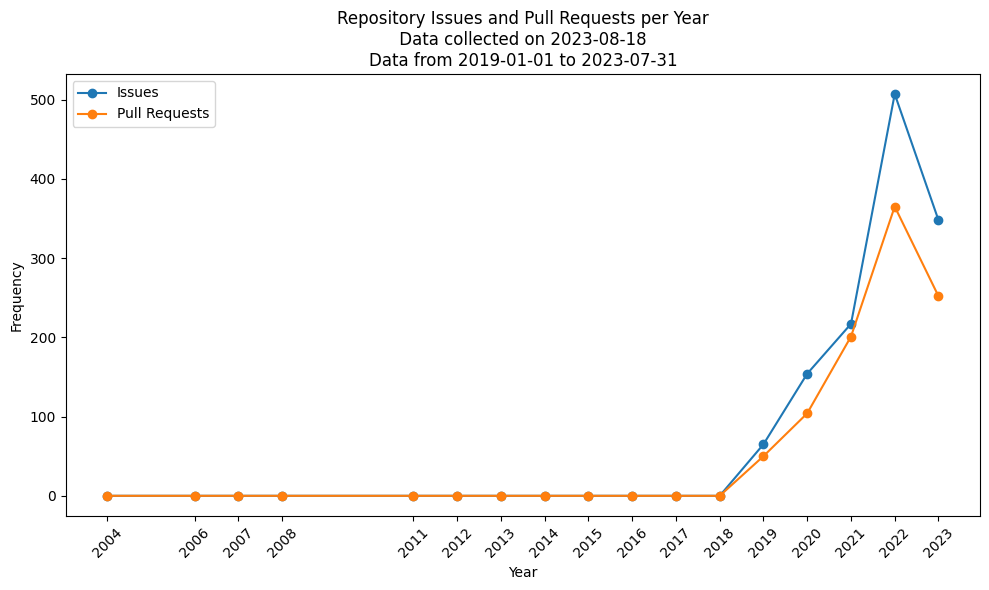

In [11]:
# Create the line chart
plt.figure(figsize=(10, 6))
#plt.plot(timeline, grouped_repository_activity_df['Commits Per Year'], label='Commits', marker='o')
plt.plot(timeline, grouped_repository_activity_df['Issues Per Year'], label='Issues', marker='o')
plt.plot(timeline, grouped_repository_activity_df['Pull Requests Per Year'], label='Pull Requests', marker='o')

# Customize the chart
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title("Repository Issues and Pull Requests per Year\n Data collected on "+current_date+" \nData from "+start_date+" to "+end_date)
plt.legend()

date_format = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_formatter(date_format)

# Set the x-axis ticks to be the same as the timeline (years) without modifications
plt.xticks(timeline)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()

# Save the plot as a PNG image
output_path = '../output/repository_activity.png'  
plt.savefig(output_path,  dpi=400, bbox_inches='tight')  

plt.show()

## Repository Distribution by Contributor Groups
##### NB: The data considers repositories with atleast one GAP file

In this part, the distribution of repositories according to the number of contributors each one has is  displayed. Knowing this distribution helps in assessing the level of collaboration among different repositories. The following steps are performed:

Data Binning: Depending on the number of contributors, repositories are divided into several groups. These collections range from those having a single contributor to those with fifty or more.

Construction of a pie chart: With the help of matplotlib, a pie chart is created. Each pie slice represents a contributor group and shows how frequently that group appears in the dataset.

Chart Annotations: Percentages are automatically computed and shown on the chart to improve clarity. Furthermore, a legend situates on the side, associating pie segments with their respective contributor groups.


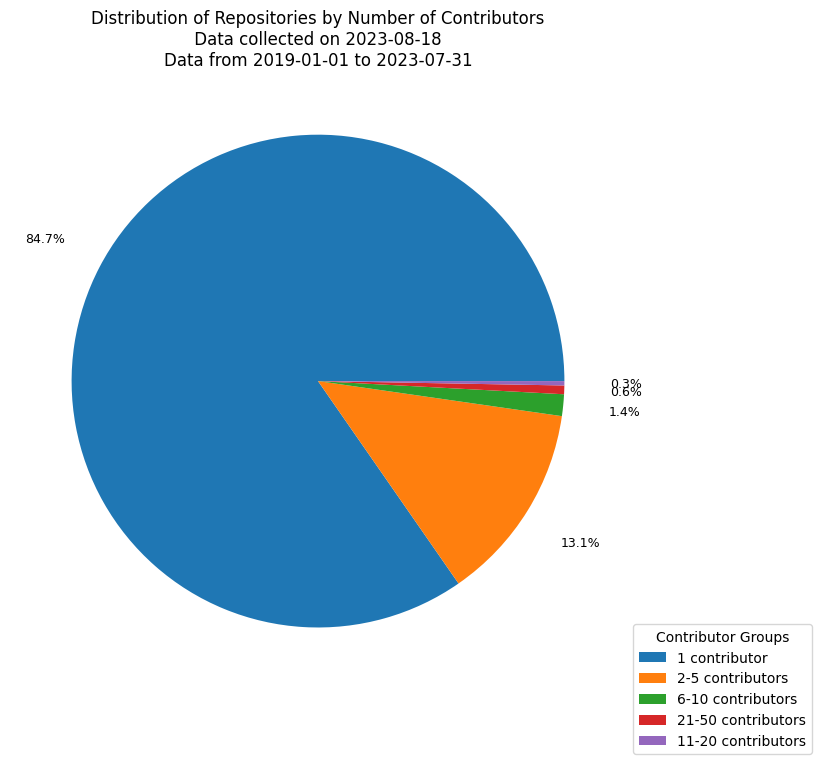

In [12]:
# The code to create pie chart is referred from https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html

bins = [0, 1, 5, 10, 20, 50, float("inf")]
labels = ["1 contributor", "2-5 contributors", "6-10 contributors", "11-20 contributors", "21-50 contributors", "50+ contributors"]
repository_df["Contributor Group"] = pd.cut(repository_df["Number of Contributors"], bins=bins, labels=labels)
contributor_groups = repository_df["Contributor Group"].value_counts()

contributor_groups = contributor_groups[contributor_groups > 0]
labels = contributor_groups.index
plt.figure(figsize=(8, 8))

wedges, texts, autotexts = plt.pie(contributor_groups, autopct='%1.1f%%', pctdistance=1.25)

plt.legend(wedges, labels,
          title="Contributor Groups",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 0))

plt.setp(autotexts, size=9)

plt.title("Distribution of Repositories by Number of Contributors\n Data collected on "+current_date+" \nData from "+start_date+" to "+end_date)
# Save the plot as a PNG image
output_path = '../output/repository_vs_collaborators.png' 
plt.savefig(output_path,  dpi=400, bbox_inches='tight')

plt.show()